# Nama : Alif Adwitiya Pratama
# Instusi : Universitas Telkom

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import tensorflow as tf

# Get Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = r"/content/drive/MyDrive/LabBasisData/rockpaperscissors"


In [4]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator( rescale=1.0/255.0,validation_split=0.4)    

train_dataset = image_generator.flow_from_directory(
                                                batch_size=1314,
                                                 directory=path,
                                                 shuffle=True,
                                                 target_size=(64, 64), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(
                                                batch_size=874,
                                                 directory=path,
                                                 shuffle=True,
                                                 target_size=(64, 64),
                                                 subset="validation",
                                                 class_mode='categorical')

labelName=train_dataset.class_indices.__class__(map(reversed,train_dataset.class_indices.items()))
print(labelName)

Found 1341 images belonging to 3 classes.
Found 890 images belonging to 3 classes.
{0: 'paper', 1: 'rock', 2: 'scissors'}


In [5]:
X,y=train_dataset.next()
y=np.argmax(y,axis=1)
Xtest,yTest=validation_dataset.next()
yTest=np.argmax(yTest,axis=1)

In [6]:
X.shape

(1314, 64, 64, 3)

# Computer Vision Menggunakan Neural Network only

## kalau mau liat datanya

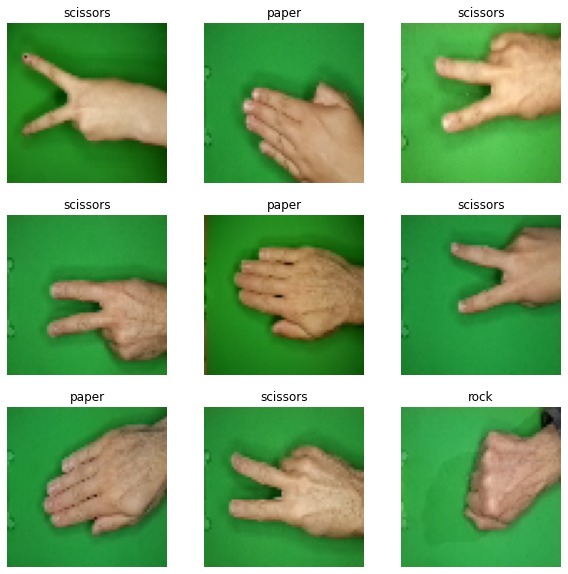

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
batch=train_dataset.next()

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)  
    plt.imshow(X[i],cmap='gray')

    
    plt.title(labelName[y[i]])  
    plt.axis("off")


## buat model

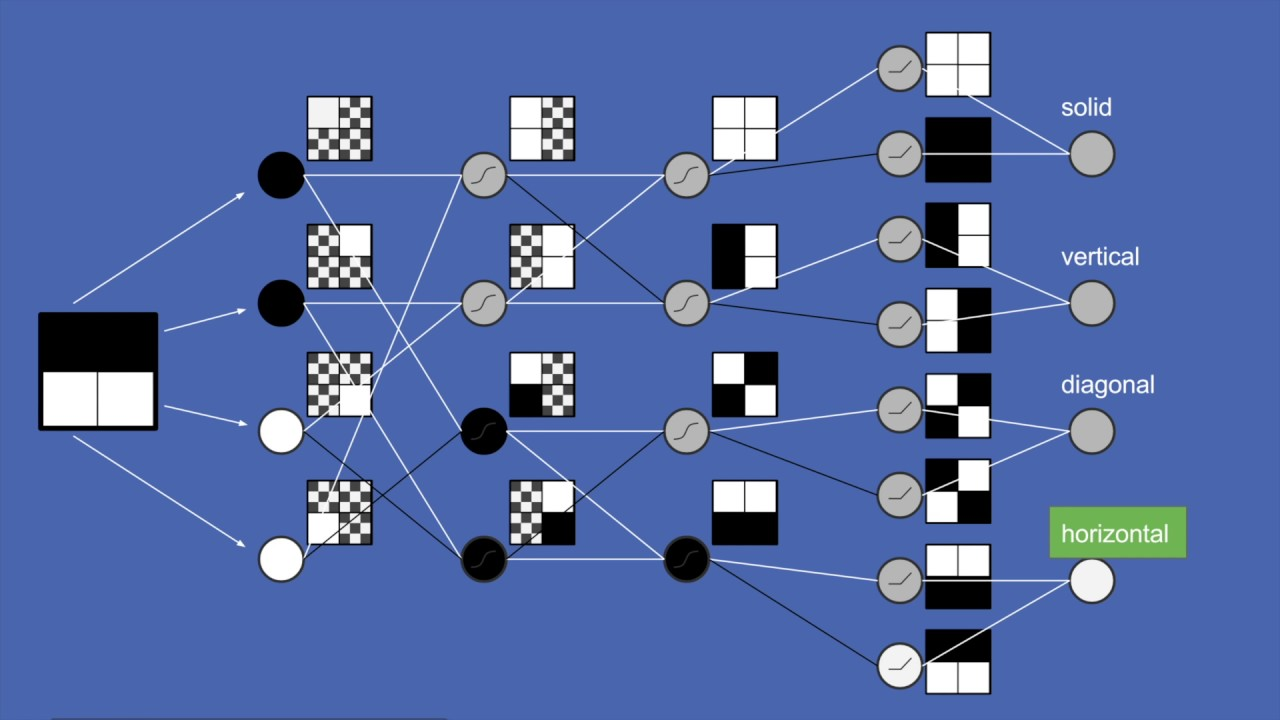

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [64, 64,3]))
model.add(tf.keras.layers.Dense(1024,activation='relu'))
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics="accuracy")
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 1024)              12583936  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 3)                 387       
                                                                 
Total params: 13,273,347
Trainable params: 13,273,347
No

In [9]:
es=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


In [10]:
history=model.fit(X,y,epochs=250,batch_size=8,validation_data=(Xtest,yTest), callbacks=[es])

Epoch 1/250
165/165 [==============================] - 3s 13ms/step - loss: 1.5877 - accuracy: 0.4658 - val_loss: 0.6464 - val_accuracy: 0.7346
Epoch 2/250
165/165 [==============================] - 2s 11ms/step - loss: 0.6929 - accuracy: 0.7245 - val_loss: 1.1042 - val_accuracy: 0.5755
Epoch 3/250
165/165 [==============================] - 2s 13ms/step - loss: 0.5768 - accuracy: 0.7945 - val_loss: 0.5120 - val_accuracy: 0.8455
Epoch 4/250
165/165 [==============================] - 2s 11ms/step - loss: 0.4718 - accuracy: 0.8364 - val_loss: 0.6828 - val_accuracy: 0.7757
Epoch 5/250
165/165 [==============================] - 2s 11ms/step - loss: 0.4374 - accuracy: 0.8463 - val_loss: 0.5332 - val_accuracy: 0.7826
Epoch 6/250
165/165 [==============================] - 2s 11ms/step - loss: 0.3955 - accuracy: 0.8562 - val_loss: 0.4026 - val_accuracy: 0.8513
Epoch 7/250
165/165 [==============================] - 2s 11ms/step - loss: 0.3728 - accuracy: 0.8554 - val_loss: 0.5934 - val_accuracy:

In [11]:
model.evaluate(Xtest,yTest)

28/28 [==============================] - 0s 5ms/step - loss: 0.2347 - accuracy: 0.9268


[0.2347164899110794, 0.9267734289169312]

In [12]:
X.shape

(1314, 64, 64, 3)

In [13]:
y

array([2, 0, 2, ..., 0, 2, 2])

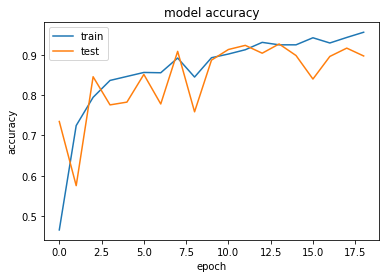

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# make model convolution layer

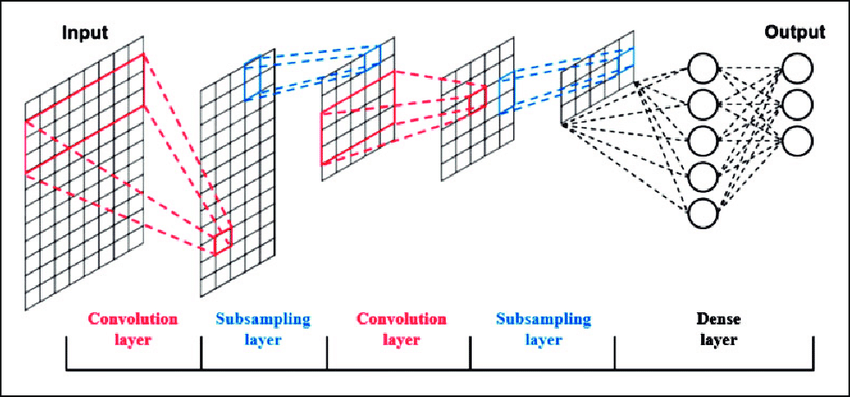

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))

model.add(tf.keras.layers.Dense(3,activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics="accuracy")
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_5 (Dense)             (None, 512)              

In [16]:
X.shape

(1314, 64, 64, 3)

In [17]:
history=model.fit(X,y,epochs=250,batch_size=16,validation_data=(Xtest,yTest), callbacks=[es])

Epoch 1/250
83/83 [==============================] - 3s 21ms/step - loss: 0.6987 - accuracy: 0.6796 - val_loss: 0.3666 - val_accuracy: 0.8593
Epoch 2/250
83/83 [==============================] - 1s 17ms/step - loss: 0.2324 - accuracy: 0.9209 - val_loss: 0.1842 - val_accuracy: 0.9279
Epoch 3/250
83/83 [==============================] - 1s 17ms/step - loss: 0.1450 - accuracy: 0.9490 - val_loss: 0.2082 - val_accuracy: 0.9348
Epoch 4/250
83/83 [==============================] - 1s 17ms/step - loss: 0.0783 - accuracy: 0.9734 - val_loss: 0.1618 - val_accuracy: 0.9519
Epoch 5/250
83/83 [==============================] - 1s 17ms/step - loss: 0.0943 - accuracy: 0.9627 - val_loss: 0.1597 - val_accuracy: 0.9462
Epoch 6/250
83/83 [==============================] - 1s 17ms/step - loss: 0.0463 - accuracy: 0.9779 - val_loss: 0.0988 - val_accuracy: 0.9657
Epoch 7/250
83/83 [==============================] - 1s 17ms/step - loss: 0.0270 - accuracy: 0.9893 - val_loss: 0.0917 - val_accuracy: 0.9725
Epoch 

In [18]:
model.evaluate(Xtest,yTest)

28/28 [==============================] - 0s 7ms/step - loss: 0.0917 - accuracy: 0.9725


[0.09171391278505325, 0.972540020942688]

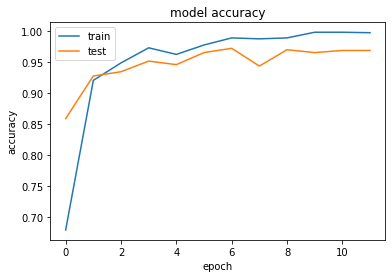

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
from sklearn.metrics import classification_report
pred=model.predict(Xtest)
pred=np.argmax(pred,axis=1)
print(classification_report(yTest,pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       280
           1       0.99      0.99      0.99       286
           2       0.97      0.97      0.97       308

    accuracy                           0.97       874
   macro avg       0.97      0.97      0.97       874
weighted avg       0.97      0.97      0.97       874



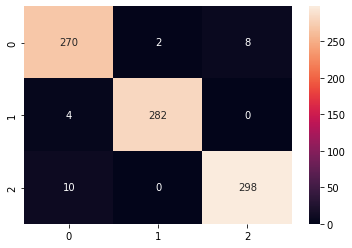

In [21]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=yTest, y_pred=pred)
sns.heatmap(cm, annot=True, fmt = 'g')


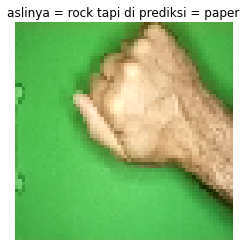

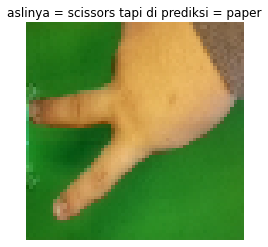

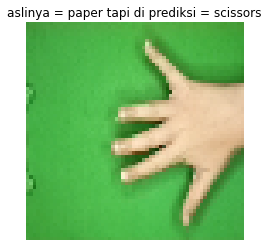

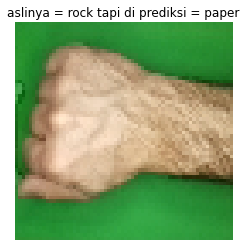

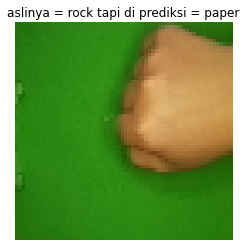

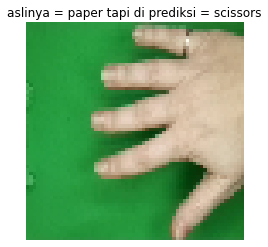

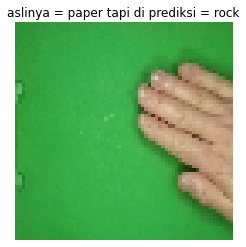

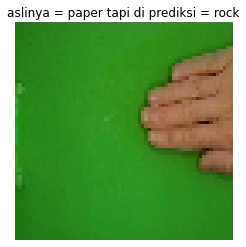

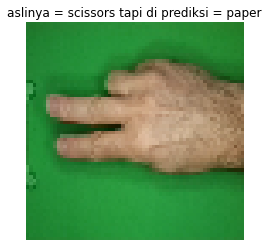

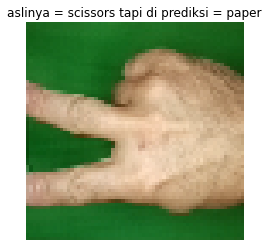

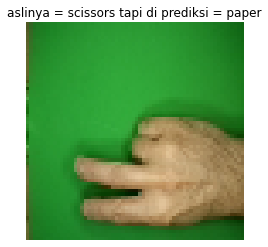

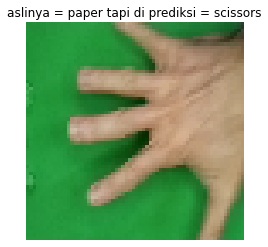

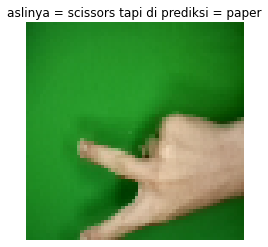

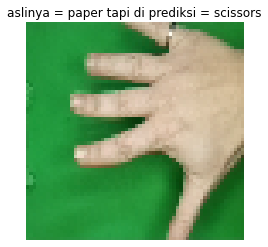

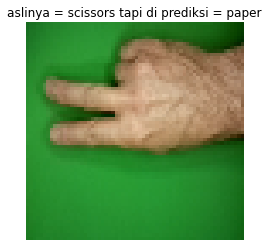

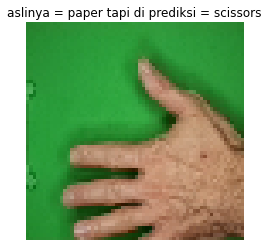

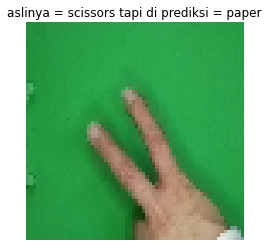

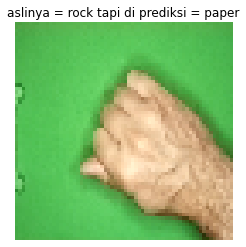

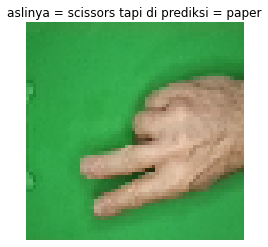

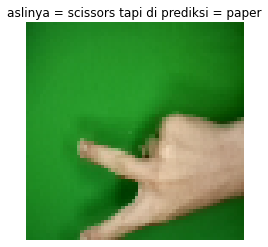

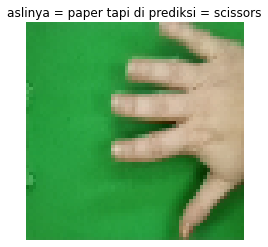

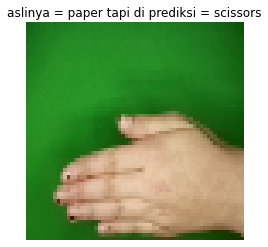

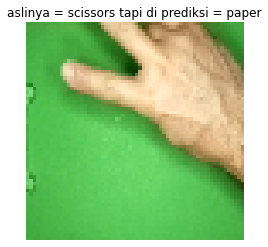

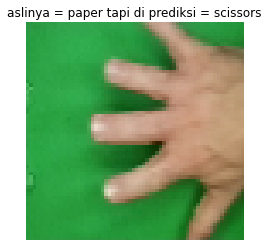

In [22]:
for i in np.argwhere(yTest!=pred).flatten():      
    plt.imshow(Xtest[i])

    
    plt.title(f"aslinya = {labelName[yTest[i]]} tapi di prediksi = {labelName[pred[i]]}")  
    plt.axis("off")
    plt.show()

In [23]:
def modelPred(img):
  
  img=cv2.resize(img, dsize=(64, 64), interpolation=cv2.INTER_CUBIC)
  img=img/255
  pred=model.predict(img[ np.newaxis,...])
  pred=np.argmax(pred,axis=1)
  return pred


Saving 2C9FEbBklwcVhF3W.png to 2C9FEbBklwcVhF3W.png
[2]


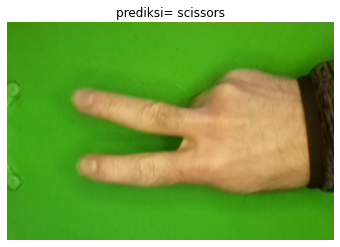

In [24]:
import cv2
from google.colab import files
upload = files.upload()



image=plt.imread(list(upload.keys())[0])
imageshow=image

pred=modelPred(image)
print(pred)

plt.imshow(imageshow)
plt.title(f"prediksi= {labelName[pred[0]]}")  
plt.axis("off")
plt.show()